<a href="https://colab.research.google.com/github/Dzhud/ZFS_Programming_Solution/blob/main/ZFS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
SRN: BP0278982
Version: 2.0
Date: 18/12/2023
'''

#Pseudocode

```
BEGIN
  IMPORT pandas, numpy, matplotlib.pyplot, seaborn, sklearn
  READ the data from the PDF into a dataframe
  DISPLAY the first five rows of the dataframe
  READ the data from the Excel file into a dataframe
  DISPLAY the last five rows of the dataframe
  WRITE the concatenation of both dataframes
  RUN different exploratory data analysis of loan application
  WRITE a function to calculate the mean absolute error
  WRITE a function to plot the actual vs predicted values
  WRITE a function to plot the residuals
  WRITE a function to perform linear regression on a given feature and target
    CREATE a linear regression model
    FIT the model on the feature and target
    PREDICT the target values using the feature values
    CALCULATE and DISPLAY the evaluation metrics
    PLOT the actual vs predicted values
    PLOT the residuals
    RETURN the model and the predictions
  END
  FOR each feature in the dataframe
    CALL the linear regression function with the feature and the target
  END
  WRITE a function to perform multiple linear regression on a given set of features and target
    CREATE a multiple linear regression model
    FIT the model on the features and target
    PREDICT the target values using the feature values
    CALCULATE and DISPLAY the evaluation metrics
    PLOT the actual vs predicted values
    PLOT the residuals
    RETURN the model and the predictions
  END
  CALL the multiple linear regression function with all the features and the target
END
```



#Extraction, Transforming, and Loading of Data (ETL)



Tabula isn't prepackaged with Colab
hence this command to install it on this environment

In [2]:
!pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 50.6 MB/s eta 0:00:00


In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import tabula
from google.colab import files

# Importing the required files at once; an alternative to manual file upload on Colab.
uploadedFiles = files.upload()

Saving PDA - Loans_Database_Table.pdf to PDA - Loans_Database_Table.pdf
Saving PDA - Zappy Loan Data.xlsx to PDA - Zappy Loan Data.xlsx


###To display dataset without truncations in columns and rows


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

###Load PDF

In [5]:
# Read the first data from the pdf in a variable called 'read_pdf'
read_pdf = tabula.read_pdf("PDA - Loans_Database_Table.pdf", pages = 'all', multiple_tables=False)[0]

In [6]:
read_pdf.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


In [7]:
# Convert into Excel File.  This will appear in the Google Colab Files Workspace area
read_pdf.to_excel('Loans_Database_Table A.xlsx', index=False)

# Store from PDF converted XLS data in a variable called 'first_loan_data'
first_loan_data = pd.read_excel('Loans_Database_Table A.xlsx')

In [8]:
first_loan_data.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


In [9]:
# Loading the other data which is an Excel file
second_loan_data = pd.read_excel("PDA - Zappy Loan Data.xlsx")

In [10]:
second_loan_data.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


###Concatenating the files

In [11]:
'''
Merging the two datasets into a single one to make the data processing and analysis easier
with the help of Pandas Library's `concat()` function.
The two datasets - `first_loan_data` and `second_loan_data` - are merged into a single data frame - concat_loan_data.
'''
concat_loan_data = pd.concat([first_loan_data, second_loan_data], ignore_index=True)

In [12]:
concat_loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
640,2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
641,2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
642,2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y
643,2984,1,1,2,1,0,7583,0.0,187,333,1,1,Y
644,2990,2,0,0,1,1,4583,0.0,133,333,0,2,N


###Data Cleaning

In [13]:
# checking for any duplicate values in the dataset 'concat_loan_data'.
concat_loan_data.duplicated().sum()


3

In [14]:
# Removing the duplicated values in 'concat_loan_data'
# with Pandas' 'drop_duplicates()' function
# and saving it in a variable called 'cleaned_loan_data'
cleaned_loan_data = concat_loan_data.drop_duplicates()

In [15]:
cleaned_loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
640,2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
641,2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
642,2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y
643,2984,1,1,2,1,0,7583,0.0,187,333,1,1,Y
644,2990,2,0,0,1,1,4583,0.0,133,333,0,2,N


In [16]:
# To recheck duplicated values in concat_loan_data again. Value must be 0 this time
cleaned_loan_data.duplicated().sum()


0

In [17]:
# Using 'Loan ID' as the primary identifier to sort.
# The provided data in the dataframe will be sorted in ascending order.
cleaned_loan_data.sort_values('Loan_ID')
cleaned_loan_data.sample(10)

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
315,2031,1,1,1,0,0,3399,1640.0,111,180,1,1,Y
9,1020,1,1,1,1,0,12841,10968.0,349,360,1,2,N
219,1734,2,1,2,1,0,4283,2383.0,127,360,0,2,Y
301,1972,1,1,0,0,0,2875,1750.0,105,360,1,2,Y
144,1508,1,1,2,1,0,11757,0.0,187,180,1,1,Y
115,1401,1,1,1,1,0,14583,0.0,185,180,1,3,Y
291,1938,1,1,2,1,0,4400,0.0,127,360,0,2,N
644,2990,2,0,0,1,1,4583,0.0,133,333,0,2,N
195,1665,1,1,1,1,0,3125,2583.0,170,360,1,2,N
57,1197,1,1,0,1,0,3366,2200.0,135,360,1,3,N


In [18]:
new_cleaned_data = cleaned_loan_data.copy()
new_cleaned_data.tail()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
640,2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
641,2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
642,2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y
643,2984,1,1,2,1,0,7583,0.0,187,333,1,1,Y
644,2990,2,0,0,1,1,4583,0.0,133,333,0,2,N


In [19]:
'''
The 'CoapplicantIncome' column has long float values as we can see from the first 50 entires in the dataset.
So we adjust them to have 2 decimal places
'''
new_cleaned_data['CoapplicantIncome'].sample(50).unique()

array([1508., 2358., 2000., 2857., 2500., 1800.,    0., 1430., 2569.,
       1774., 2083.,  800., 1459., 2925., 1255., 4083., 3796., 1868.,
       2405., 5625., 7166., 1875., 1911., 1840., 4167., 1857., 1733.,
       1779.,  923., 1775.])

In [20]:
# Function that takes a float value as an argument, converts it to 2 decimal places and renders it back to a float
def twoDecimalPlaces(num: float):

  getInput = format(num, '.2f')
  convertInput = float(getInput)
  return convertInput


In [21]:
'''
 Using Pandas' 'apply()' function we apply 'twoDecimalPlaces()'
 to the entire 'CoapplicantIncome' column of 'new_cleaned_data' dataset.
 Then the 'applicantIncome' column of the main dataset is assigned the newly adjusted column
'''
new_cleaned_data['CoapplicantIncome'] = new_cleaned_data['CoapplicantIncome'].apply(twoDecimalPlaces)

In [22]:
new_cleaned_data['CoapplicantIncome'].head()

0       0.0
1    1508.0
2       0.0
3    2358.0
4       0.0
Name: CoapplicantIncome, dtype: float64

In [23]:
'''
 Saving the new cleaned dataset as a csv file in the Colab environemnt and locally for future use.
 Name of the file is 'new_cleaned_loan_data.csv'
'''
new_cleaned_data.to_csv("new_cleaned_loan_data.csv", index=False)

In [24]:
'''
Copy main dataset 'new_cleaned_data' to a new variable 'loan_data'
for easy revertion in the case of errors or omission during exploratory analysis
'''
loan_data = new_cleaned_data.copy()

#Exploratory Data Analysis (EDA)

###Total amount loaned by ZFS

In [25]:
'''
 Filter the main dataframe by 'Loan_Status' value with 'Y' which signify approved loans.
 Then calculate the sum of 'LoanAmount' column of the filtered dataframe
'''
total_approved_amount = loan_data[(loan_data['Loan_Status'] == 'Y')]['LoanAmount'].sum()
print(f'Total Amount of Approved Loans: £{total_approved_amount}')

# Therefore ZFS Loaned out £64,408

Total Amount of Approved Loans: £64408


In [26]:
total_amount_applied = loan_data['LoanAmount'].sum()
print(f'Total Amount Applied: £{total_amount_applied}')
confirmation = total_amount_applied - total_approved_amount

total_rejected_amount = loan_data[(loan_data['Loan_Status'] == 'N')]['LoanAmount'].sum()
print(f"Total rejected Loan: £{total_rejected_amount}\n Confirmation of Rejection: £{confirmation}")

# Total Amount applied: £95,164
# Total Amount rejected: £30,756
# Therefore 67.53% of total loan amount applied for were approved.

Total Amount Applied: £95164
Total rejected Loan: £30756
 Confirmation of Rejection: £30756


In [131]:
loan_data['ApplicantIncome'].max()
#£81,000 is the highest loan applied for and wasn't approved


81000

###Average Amount Loaned

In [27]:
'''
 To calculate the average amount that ZFS loaned out our main dataframe is filtered in 'average_amount_loaned' variable
 where the average of rows with successful ('Y') loan applications is retrieved
 using Pandas' 'mean()' function. The calculated value is then rounded up to 2 decimal places with
 Python's inbuilt 'round()' that takes two arguments here- the value and the specified ndigits
 that is the number of decimal places to round the number to.
'''
average_amount_loaned = loan_data[(loan_data['Loan_Status'] == 'Y')]['LoanAmount'].mean()
print(f"Average Amount Loaned: £{round(average_amount_loaned, 2)}")

# Average amount loaned is £145.06

Average Amount Loaned: £145.06


###The average loan term

In [28]:
loan_term = loan_data['Loan_Amount_Term']
average_loan_term = loan_term.mean()
print(f'Average Loan Term: {round(average_loan_term)}')

# Average loan term of approved loans
average_loan_term_approvals = loan_data[(loan_data['Loan_Status'] == 'Y')]['Loan_Amount_Term'].mean()
print(f'Average Loan Term of Successfuly Applications: {round(average_loan_term_approvals)}')

# Average loan term of rejected applications
average_loan_term_rejections = loan_data[(loan_data['Loan_Status'] == 'N')]['Loan_Amount_Term'].mean()
print(f'Average Loan Term of Rejected Loan Applications: {round(average_loan_term_approvals)}')

'''
Average Loan Term: 334
Average Loan Term of Successfuly Applications: 333
Average Loan Term of Rejected Loan Applications: 333
'''

Average Loan Term: 334
Average Loan Term of Successfuly Applications: 333
Average Loan Term of Rejected Loan Applications: 333


'\nAverage Loan Term: 334\nAverage Loan Term of Successfuly Applications: 333\nAverage Loan Term of Rejected Loan Applications: 333\n'

###The total number of applicants broken down into Approved and Rejected, the number of males and female in each case, and shown in  chart

##Total number of applicants broken down into Approved and Rejected

In [29]:
total_number_approval = loan_data[(loan_data['Loan_Status'] == 'Y')]
print(f'Total Number of Successful Applicants: {len(total_number_approval)}')

total_number_rejection = loan_data[(loan_data['Loan_Status'] == 'N')]
print(f'Total Number of Rejected Applicants: {len(total_number_rejection)}')


# Total Number of Successful Applicants: 444
# Total Number of Rejected Applicants: 198


Total Number of Successful Applicants: 444
Total Number of Rejected Applicants: 198


###Male

In [30]:
'''
 To calculate number of male applicants (successful and rejections)
 using Python's 'len()' function.
 Calculate Percentage of Male Approval too
'''


male_total = len(loan_data[(loan_data['Gender'] == 1)])
print(f'Total Male Applicants: {male_total}')
# Total Male Applicants: 525

male_total_success = loan_data[(loan_data['Gender'] == 1) & (loan_data['Loan_Status'] == 'Y')]
print(f'Total Successful Male Applicants: {len(male_total_success)}')
# Total Number of Successful Male Applicants: 364

male_total_rejection = loan_data[(loan_data['Gender'] == 1) & (loan_data['Loan_Status'] == 'N')]
print(f'Total Successful Male Applicants: {len(male_total_rejection)}')
# Total Number of Rejected Male Applicants: 161

male_success_percentage = (len(male_total_success) / male_total) * 100
print(f'Percentage of Successful Male Applications: {round(male_success_percentage)}%')
# Percentage of Successful male Applications: 69%

Total Male Applicants: 525
Total Successful Male Applicants: 364
Total Successful Male Applicants: 161
Percentage of Successful Male Applications: 69%


In [31]:
# Visualization
# Importing matplot library for visualization
import matplotlib.pyplot as plt

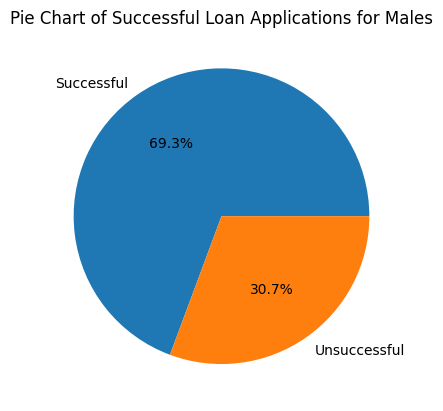

In [32]:
# Chart showing successful male applications against the total number of male applications
all_male_table = loan_data[(loan_data['Gender'] == 1) ].shape[0]
all_male_success = male_total_success.shape[0]

plt.pie([all_male_success, all_male_table - all_male_success], labels=['Successful', 'Unsuccessful'], autopct="%1.1f%%")
plt.title("Pie Chart of Successful Loan Applications for Males")
plt.show()

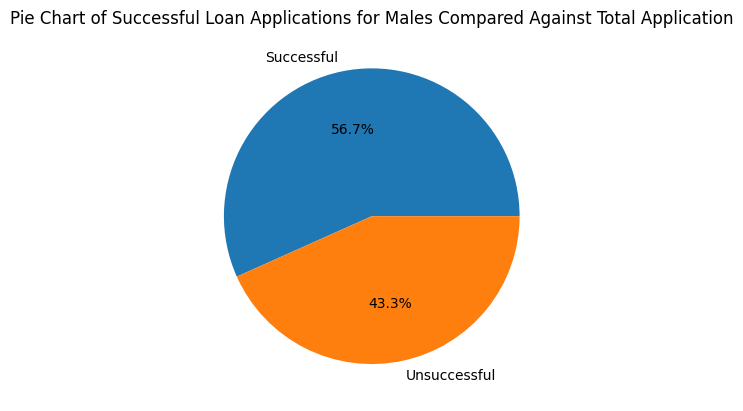

In [33]:
# Chart to show successful male applications against the total number of applications
all_table = loan_data.shape[0]

plt.pie([all_male_success, all_table - all_male_success], labels=['Successful', 'Unsuccessful'], autopct="%1.1f%%")
plt.title("Pie Chart of Successful Loan Applications for Males Compared Against Total Application")
plt.show()

###Female

In [34]:
'''
  To calculate number of female applicants (successful and rejections)
  using Python's 'len()' function
  Calculate Percentage of Female Approval too
'''
female_total = len(loan_data[(loan_data['Gender'] == 2)])
print(f'Total Female Applicants: {female_total}')
# Total Female Applicants: 117

female_total_success = loan_data[(loan_data['Gender'] == 2) & (loan_data['Loan_Status'] == 'Y')]
print(f'Total Successful Female Applicants: {len(female_total_success)}')
# Total Number of Successful Female Applicants: 80

female_total_rejection = loan_data[(loan_data['Gender'] == 2) & (loan_data['Loan_Status'] == 'N')]
print(f'Total Successful Female Applicants: {len(female_total_rejection)}')
# Total Number of Rejected Female Applicants: 37

female_success_percentage = (len(female_total_success) / female_total) * 100
print(f'Percentage of Successful Female Applications: {round(female_success_percentage)}%')
# Percentage of Successful Female Applications: 68%

Total Female Applicants: 117
Total Successful Female Applicants: 80
Total Successful Female Applicants: 37
Percentage of Successful Female Applications: 68%


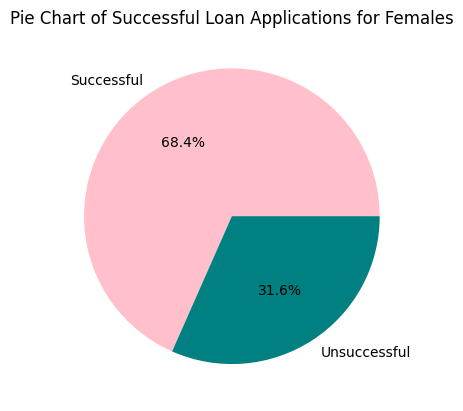

In [35]:
# Visualization

# Chart to show successful female applications against the total number of female applications
all_female_table = loan_data[(loan_data['Gender'] == 2) ].shape[0]
all_female_success = female_total_success.shape[0]
colors = ['pink', 'teal']

plt.pie([all_female_success, all_female_table - all_female_success], labels=['Successful', 'Unsuccessful'], colors=colors, autopct="%1.1f%%")
plt.title("Pie Chart of Successful Loan Applications for Females")
plt.show()




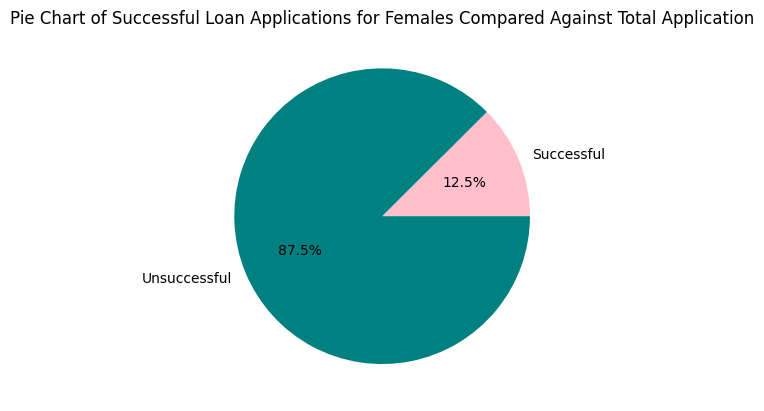

In [36]:
# Chart to show successful female applications against the total number of applications

plt.pie([all_female_success, all_table - all_female_success], labels=['Successful', 'Unsuccessful'], colors=colors, autopct="%1.1f%%")
plt.title("Pie Chart of Successful Loan Applications for Females Compared Against Total Application")
plt.show()

###The maximum and minimum of amounts loaned and charts

Maximum

In [37]:
# Getting the highest amounts loan with Pandas' 'nlargest()' and the maximum with 'max()'
# from successful applications' variable 'total_number_approval'
top_5_highest_loans = total_number_approval.nlargest(5, 'LoanAmount')
top_5_highest_loans['LoanAmount']

171    700
130    650
155    600
592    600
635    496
Name: LoanAmount, dtype: int64

In [39]:
print(f"The Maximum amount loaned is: £{top_5_highest_loans['LoanAmount'].max()}")
# £700

The Maximum amount loaned is: £700


In [102]:
top_10_highest_loans = total_number_approval.nlargest(10, 'LoanAmount')
top_10_highest_loans[['Gender', 'LoanAmount', 'Graduate', 'Married', 'Credit_History', 'Self_Employed', 'Property_Area', 'Dependents']]
# 8 of the top 10 highest loan beneficiaries are males
# Top 10 loan beneficiaries are all Graduates

,Gender,LoanAmount,Graduate,Married,Credit_History,Self_Employed,Property_Area,Dependents
171,1,700,1,1,1,0,1,3
130,1,650,1,0,0,1,1,0
155,1,600,1,1,0,0,2,3
592,2,600,1,1,1,1,2,1
635,2,496,1,1,1,0,2,1
333,1,490,1,1,1,0,1,0
537,1,480,1,1,0,0,1,0
554,1,480,1,1,1,1,3,2
278,1,436,1,1,1,0,2,0
412,1,436,1,1,1,0,2,0


Minimum

In [101]:
top_10_lowest_loans = total_number_approval.nsmallest(10, 'LoanAmount')
top_10_lowest_loans[['Gender', 'LoanAmount', 'Graduate', 'Married', 'Credit_History', 'Self_Employed', 'Property_Area', 'Dependents']]

,Gender,LoanAmount,Graduate,Married,Credit_History,Self_Employed,Property_Area,Dependents
14,1,17,1,1,1,0,1,2
94,1,25,0,0,1,0,2,0
133,1,25,1,1,1,1,2,0
586,1,26,1,1,1,0,2,1
147,1,30,1,1,1,0,1,1
270,2,30,1,0,1,0,1,0
613,2,36,1,1,1,0,2,0
540,2,40,1,0,1,0,1,1
641,1,40,1,1,1,0,3,3
231,1,42,1,1,1,0,3,0


In [43]:
print(f"The Minimum amount loaned is: {top_10_lowest_loans['LoanAmount'].min()}")
# 17

The Minimum amount loaned is: 17


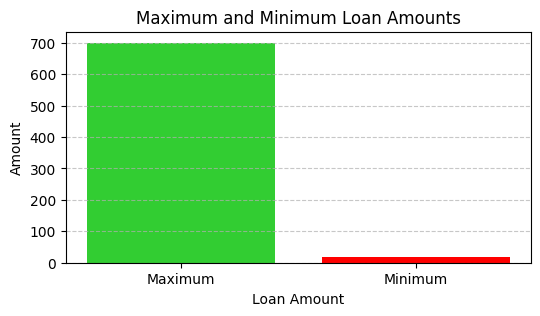

In [44]:
# Visualization

fig, ax = plt.subplots(figsize=(6, 3))  # Set the figure and axis size

# Create the bar chart
plt.bar(["Maximum", "Minimum"], [top_5_highest_loans['LoanAmount'].max(), top_10_lowest_loans['LoanAmount'].min()], color=['limegreen', 'red'])

# Add labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Amount')
plt.title('Maximum and Minimum Loan Amounts')

# Set the bar width
plt.bar_width = 0.3

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis ticks for better readability
plt.xticks(rotation=0)

plt.show()

###The number of self-employed who had their loan approved

In [45]:
total_self_emp = total_number_approval[total_number_approval['Self_Employed'] == 1]

print(f"Total number of self-employed with successful loans: {len(total_self_emp)}")

# Total number of self-employed with successful loans: 56



Total number of self-employed with successful loans: 56


Percentage of Self-Employed People who had their loan approved expressed as a percentage of all who had their loan approved,

In [46]:
pct_sel_emp = (len(total_self_emp) / len(total_number_approval)) * 100

print(f'Percentage of Successful Self-Employed Candidates: {round(pct_sel_emp)}%')
# Percentage of Successful Self-Employed Candidates: 68%


Percentage of Successful Self-Employed Candidates: 13%


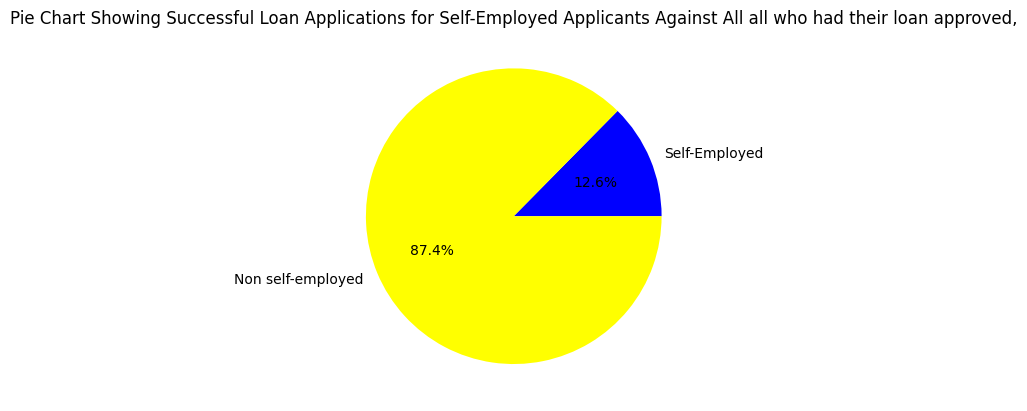

In [47]:
# Visualization
plt.pie([len(total_self_emp), len(total_number_approval) - len(total_self_emp)], labels=['Self-Employed', 'Non self-employed'], colors=['blue', 'yellow'], autopct="%1.1f%%")
plt.title("Pie Chart Showing Successful Loan Applications for Self-Employed Applicants Against All all who had their loan approved,")
plt.show()

###The distribution of properties (rural, urban, & Semiurban) of all loan applicants and chart.

In [50]:
# Property_Area: 1-Urban, 2-Semiurban, 3-Rural
total_urban_apps = loan_data[loan_data['Property_Area'] == 1]

print(f"Total Urban Applications: {len(total_urban_apps)}")
# Total Urban: 213

Total Urban Applications: 213


In [51]:
total_semiUbn_apps = loan_data[loan_data['Property_Area'] == 2]

print(f"Total Semi-Urban Applications: {len(total_semiUbn_apps)}")
# Total Semi-Urban: 242

Total Semi-Urban Applications: 242


In [52]:
total_rural_apps = loan_data[loan_data['Property_Area'] == 3]

print(f"Total Rural Applications: {len(total_rural_apps)}")
# Total Rural: 187

Total Rural Applications: 187


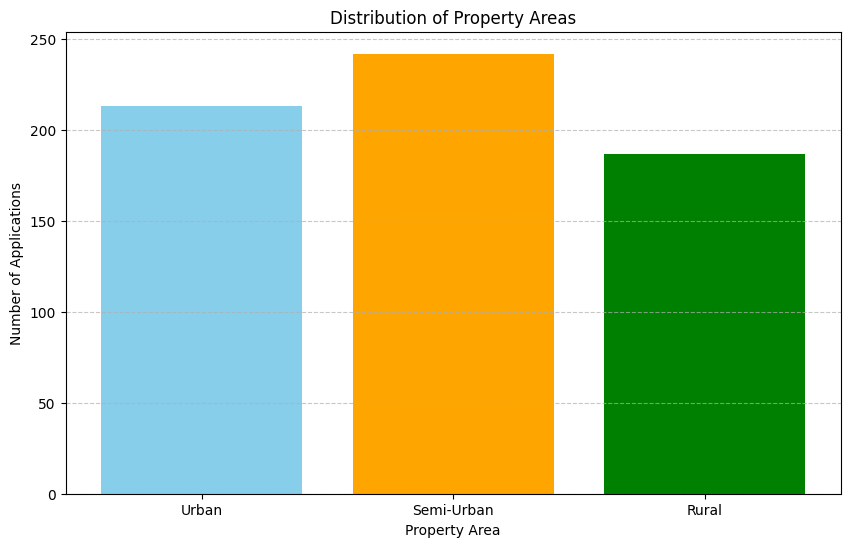

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure and axis size

# Create the bar chart
plt.bar(["Urban", "Semi-Urban", "Rural"], [len(total_urban_apps), len(total_semiUbn_apps), len(total_rural_apps)], color=['skyblue', 'orange', 'green'])

# Add labels and title
plt.xlabel('Property Area')
plt.ylabel('Number of Applications')
plt.title('Distribution of Property Areas')

# Set the bar width
plt.bar_width = 0.3

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the x-axis ticks
plt.xticks(rotation=0)

plt.show()

###Successful Applications and distribution of properties

In [64]:
urban_success =  total_number_approval[total_number_approval['Property_Area'] == 1]
print(f"Total Urban Property applications approved: {len(urban_success)}")
#Urban Success: 140

semiUrb_success =  total_number_approval[total_number_approval['Property_Area'] == 2]
print(f"Total Semi-Urban Property applications approved: {len(semiUrb_success)}")
#Semi-Urban Success: 187

rural_success = total_number_approval[total_number_approval['Property_Area'] == 3]
print(f"Total Rural Property applications approved: {len(rural_success)}")
#Urban Success: 117

Total Urban Property applications approved: 140
Total Semi-Urban Property applications approved: 187
Total Rural Property applications approved: 117


In [71]:
# Success Percentage of Property Area Applications
# Values are rounded up.

urban_success_percentage = (len(urban_success) / len(total_urban_apps)) * 100
print(f"{round(urban_success_percentage)}% of total urban property applications were approved")

semiUrb_success_percentage = (len(semiUrb_success) / len(total_semiUbn_apps)) * 100
print(f"{round(semiUrb_success_percentage)}% of total Semi-Urban property applications were approved")

rural_success_percentage = (len(rural_success) / len(total_rural_apps)) * 100
print(f"{round(rural_success_percentage)}% of total rural property applications were approved")

66% of total urban property applications were approved
77% of total Semi-Urban property applications were approved
63% of total rural property applications were approved


In [70]:
# Success Percentage of Property Area Applications expressed as percetnage of total Applications
urban_success_pct = (len(urban_success) / len(loan_data)) * 100
print(f"Percentage of Urban Property Area Approved: {round(urban_success_pct)}%")

semiUrb_success_pct = (len(semiUrb_success) / len(loan_data)) * 100
print(f"Percentage of Semi-Urban Property Area Approved: {round(semiUrb_success_pct)}%")

rural_success_pct = (len(rural_success) / len(loan_data)) * 100
print(f"Percentage of Urban Property Area Approved: {round(rural_success_pct)}%")

Percentage of Urban Property Area Approved: 22%
Percentage of Semi-Urban Property Area Approved: 29%
Percentage of Urban Property Area Approved: 18%


###Income of Applicants

In [73]:
# Average Income of all Applicants
avg_income_of_applicants = loan_data['ApplicantIncome'].mean()

print(f"Average Income of All Applicants: £{round(avg_income_of_applicants)}")

Average Income of All Applicants: £5370


In [79]:
# Average Income of Applicants that are self-Employed
avg_income_selfEmp = loan_data[(loan_data['Self_Employed'] == 1)]['ApplicantIncome'].mean()

print(f"Average Income of Self-Employed Applicants: £{round(avg_income_selfEmp)}")

Average Income of Self-Employed Applicants: £7341


In [80]:
# Average Income of Applicants that are not self-Employed
avg_income_non_selfEmp = loan_data[(loan_data['Self_Employed'] == 0)]['ApplicantIncome'].mean()

print(f"Average Income of Not Self-Employed Applicants: £{round(avg_income_non_selfEmp)}")

Average Income of None Self-Employed Applicants: £5078


In [81]:
# Average Income of All Graduate Applicants
avg_income_graduate = loan_data[(loan_data['Graduate'] == 1)]['ApplicantIncome'].mean()

print(f"Average Income of All Graduate Applicants: £{round(avg_income_graduate)}")

Average Income of All Graduate Applicants: £5819


###Percentage of Graduate Applicants with Approved Loans

In [99]:
total_grads = len(loan_data[loan_data['Graduate'] == 1])
grad_success = len(loan_data[(loan_data['Graduate'] == 1) & (loan_data['Loan_Status'] == 'Y')])
print(f"Total number of Graduate Applicants: {total_grads}")
print(f"Total number of Graduate Applicants with Approved Loans: {grad_success}")
print(f"{round((grad_success/total_grads)*100)}% of graduates got thei loan applications approved")
print('***********')
grad_success_pct = (grad_success) / len(loan_data) * 100
print(f"Percentage of Graduate Applicants with Approved Loans: {round(grad_success_pct)}%")

Total number of Graduate Applicants: 503
Total number of Graduate Applicants with Approved Loans: 360
72% graduates got thei loan applications approved
***********
Percentage of Graduate Applicants with Approved Loans: 56%


Text(0, 0.5, 'Applicant Income')

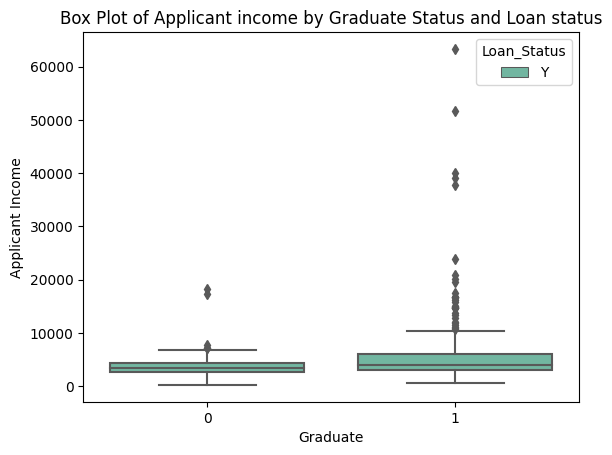

In [113]:
# Using Seaborn library for Visualization
import seaborn as sns

check_income = total_number_approval[['ApplicantIncome', 'Graduate', 'Loan_Status']]
sns.boxplot(x='Graduate', y='ApplicantIncome', hue='Loan_Status', data=check_income, palette='Set2')

# Set the title and labels
plt.title('Box Plot of Applicant income by Graduate Status and Loan status')
plt.xlabel('Graduate')
plt.ylabel('Applicant Income')

#Model Training

Logistic Regression is used to determine whether or not the applications are approved for the loan. Since, given the data we have, logistic regression is the optimal strategy for achieving high accuracy.

In [120]:
#Loading Modules
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [121]:
# A cleaned version of the main dataset 'loan_data' is copied in the variable 'data_for_model'
data_for_model = loan_data.copy()

Displaying the data in tabular format

In [122]:
data_for_model.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


Converting the data frame into X and Y nd-arrays.

In [123]:
x_data=data_for_model.iloc[:,1:-1].values
y_data=data_for_model.iloc[:,-1].values

Printing the X array along with its shape

In [124]:
print('X data: ', x_data)

X data:  [[  1.   0.   0. ... 360.   1.   1.]
 [  1.   1.   1. ... 360.   1.   3.]
 [  1.   1.   0. ... 360.   1.   1.]
 ...
 [  1.   1.   1. ... 333.   1.   1.]
 [  1.   1.   2. ... 333.   1.   1.]
 [  2.   0.   0. ... 333.   0.   2.]]


Printing the Y array along with its shape

In [125]:
print('Y data:', y_data)

Y data: ['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y

Splitting the X array into x_train and x_test arrays.

Similarly, splitting the Y array into y_train and y_test arrays.

Here, test data and train data are in the ratio of 70 : 30 for X and Y respectively.

In [126]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.30, random_state=7)

We have made a Logistic Regression model and fitted it with x_train and y_train, which is the same as training it. The values from the x_test array are then predicted, and the anticipated values are checked with y_test to produce an accuracy score for our model.

In [127]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
score = accuracy_score(y_test, predictions)
print(f'Accuracy: {round(score*100,3)}%')

Accuracy: 79.275%


###An accuracy level of **79.275%** was derived for this ML model.

In [130]:
loan_data['ApplicantIncome'].max()
#£81,000 is the highest loan applied for and wasn't approved


418